# Advanced Homework 2 

## Required Libraries

In [1]:
# General Libraries
import numpy as np
import pandas as pd 

# Plotting Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import mglearn 

# Sklearn Libraries 
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

# Ignoring warnings in the whole notebook
import warnings
warnings.filterwarnings('ignore')

## Task 1: Classification on the 'credit-g' Dataset

In [2]:
# Fetching the Datset using fetch_openml
dataset_credit = fetch_openml('credit-g')

In [3]:
# Concating the Data and Target Column as a whole Dataframe
df_credits = pd.concat([dataset_credit['data'], dataset_credit['target']], axis=1)
df_credits

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


In [4]:
# Some Information on the Dataset
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   float64 
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   float64 
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   float64 
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   float64 
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   float64 
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

In [5]:
# Some Additional Information on the DataFrame
df_credits.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


### 1.1) Determine which features are continuous and which are categorical.


In [6]:
# Selecting numerical features from the dataset
num_feats = df_credits.select_dtypes(np.number).columns.tolist()
print('NUMERICAL FEATURES: \n')
num_feats

NUMERICAL FEATURES: 



['duration',
 'credit_amount',
 'installment_commitment',
 'residence_since',
 'age',
 'existing_credits',
 'num_dependents']

In [7]:
# Other columns are Categorical Features 
cat_feats = list((set(df_credits.columns) - set(num_feats)))
print('CATEGORICAL FEATURES: \n')
cat_feats

CATEGORICAL FEATURES: 



['employment',
 'checking_status',
 'own_telephone',
 'savings_status',
 'property_magnitude',
 'job',
 'housing',
 'foreign_worker',
 'purpose',
 'credit_history',
 'personal_status',
 'other_payment_plans',
 'class',
 'other_parties']

In [8]:
# Checking for Null Values
df_credits.isna().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

### 1.2) Visualize the univariate distribution of each continuous feature, and the distribution of the target.

In [9]:
# Setting a style
sns.set_style('darkgrid')

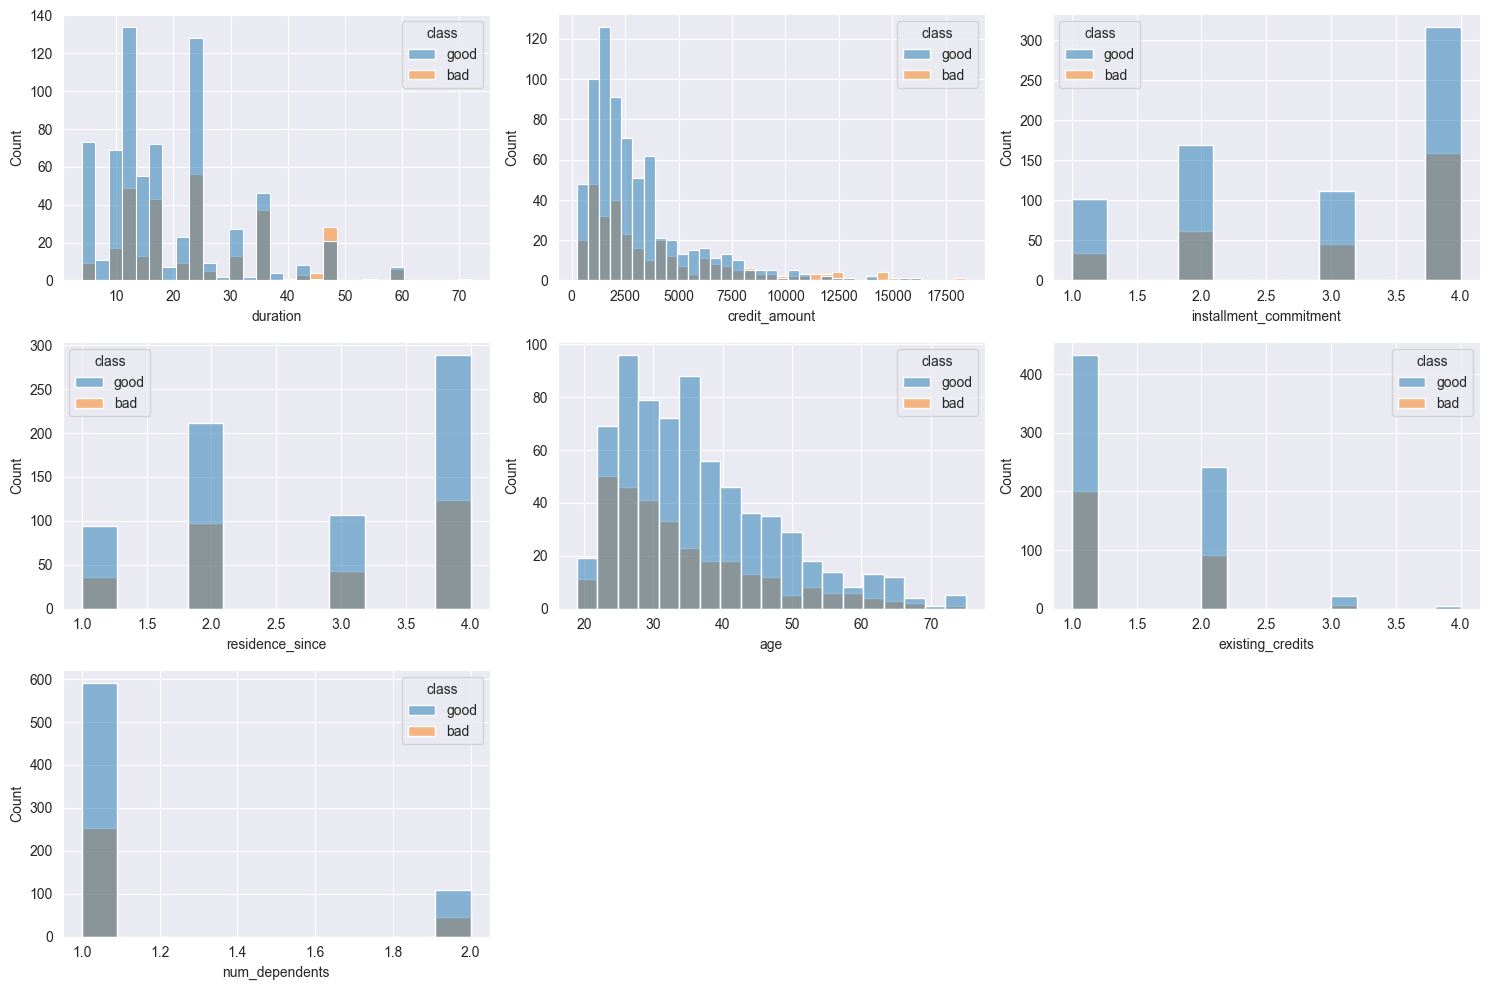

In [10]:
# Setting a Figure for the Graph
plt.figure(figsize=(15,10))

# Using a For Loop
# For all the columns i am setting hue = 'class'
for index, column in enumerate(num_feats): 
    ax = plt.subplot(3, 3, index + 1)
    sns.histplot(data=df_credits, x = column, hue= 'class', ax=ax)
    plt.tight_layout()

<Axes: xlabel='class', ylabel='count'>

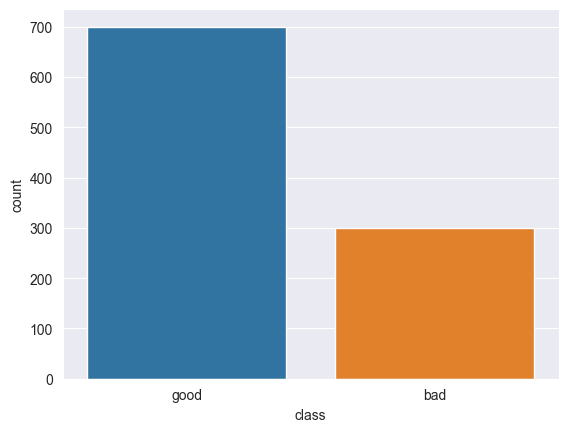

In [11]:
# Distribution of target alone
sns.countplot(data=df_credits, x='class')

### 1.3) Split data into training and test set. Do not use the test set until a final evaluation in 1.5. Preprocess the data (such as treatment of categorical variables) without using a pipeline and evaluate an initial LogisticRegression model with an training/validation split.

In [12]:
# Splitting the dataset into features and target first
df_X, df_y = df_credits.drop(columns=['class']), df_credits['class']

In [13]:
# Our Dataset with only Features Columns
df_X

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,4.0,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,4.0,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,4.0,car,38.0,none,own,1.0,skilled,1.0,none,yes
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,4.0,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes


In [14]:
# Our Target Column
df_y

0      good
1       bad
2      good
3      good
4       bad
       ... 
995    good
996    good
997    good
998     bad
999    good
Name: class, Length: 1000, dtype: category
Categories (2, object): ['good', 'bad']

In [15]:
# Making a Train-Test Split for the above dataset
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.20, random_state=6)

In [16]:
# Our Training Features
X_train.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
771,<0,36.0,critical/other existing credit,education,8065.0,<100,1<=X<4,3.0,female div/dep/mar,none,2.0,no known property,25.0,none,own,2.0,high qualif/self emp/mgmt,1.0,yes,yes
938,0<=X<200,60.0,existing paid,education,6288.0,<100,1<=X<4,4.0,male single,none,4.0,no known property,42.0,none,for free,1.0,skilled,1.0,none,yes
223,no checking,24.0,delayed previously,business,2978.0,no known savings,1<=X<4,4.0,male single,none,4.0,real estate,32.0,none,own,2.0,skilled,2.0,yes,yes
378,0<=X<200,36.0,existing paid,new car,14318.0,<100,>=7,4.0,male single,none,2.0,no known property,57.0,none,for free,1.0,high qualif/self emp/mgmt,1.0,yes,yes
88,<0,18.0,existing paid,new car,2249.0,100<=X<500,4<=X<7,4.0,male single,none,3.0,car,30.0,none,own,1.0,high qualif/self emp/mgmt,2.0,yes,yes


In [17]:
# Our Testing Features
y_train.head()

771     bad
938     bad
223    good
378     bad
88     good
Name: class, dtype: category
Categories (2, object): ['good', 'bad']

In [18]:
# Categorical Features for only X_train
catfeats_train = cat_feats.copy()
catfeats_train.remove('class')
catfeats_train

['employment',
 'checking_status',
 'own_telephone',
 'savings_status',
 'property_magnitude',
 'job',
 'housing',
 'foreign_worker',
 'purpose',
 'credit_history',
 'personal_status',
 'other_payment_plans',
 'other_parties']

In [19]:
# For Categorical Features OneHotEncoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore', drop='if_binary')
X_transformed_cat = ohe.fit_transform(X_train[catfeats_train])
newcat_columns = ohe.get_feature_names_out()
df_trcat = pd.DataFrame(data=X_transformed_cat, columns=newcat_columns, index=X_train.index)
df_trcat

,employment_1<=X<4,employment_4<=X<7,employment_<1,employment_>=7,employment_unemployed,checking_status_0<=X<200,checking_status_<0,checking_status_>=200,checking_status_no checking,own_telephone_yes,...,personal_status_female div/dep/mar,personal_status_male div/sep,personal_status_male mar/wid,personal_status_male single,other_payment_plans_bank,other_payment_plans_none,other_payment_plans_stores,other_parties_co applicant,other_parties_guarantor,other_parties_none
771,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
938,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
223,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
378,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
88,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
980,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
227,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
713,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [20]:
# Standard Scaler for Numeric Features
stdscal = StandardScaler()
X_transformed_num = stdscal.fit_transform(X_train[num_feats])
df_trnum = pd.DataFrame(data = X_transformed_num, columns=num_feats, index=X_train.index)
df_trnum

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
771,1.262615,1.704063,0.004437,-0.770007,-0.926623,1.053628,-0.420084
938,3.258679,1.075134,0.891802,1.036461,0.568817,-0.695132,-0.420084
223,0.264582,-0.096366,0.891802,1.036461,-0.310854,1.053628,2.380476
378,1.262615,3.917172,0.891802,-0.770007,1.888324,-0.695132,-0.420084
88,-0.234434,-0.354379,0.891802,0.133227,-0.486788,-0.695132,2.380476
...,...,...,...,...,...,...,...
618,0.763599,0.067502,-0.882928,1.036461,-1.278492,-0.695132,-0.420084
980,0.763599,1.817674,-0.882928,-0.770007,1.184587,-0.695132,-0.420084
227,-0.733450,1.633278,0.891802,1.036461,1.536455,-0.695132,-0.420084
713,-0.982958,-0.747593,0.891802,1.036461,-0.926623,1.053628,-0.420084


In [21]:
# Whole Transformed Dataset
df_trans_manX = pd.concat([df_trcat, df_trnum], axis=1)
df_trans_manX.head()

,employment_1<=X<4,employment_4<=X<7,employment_<1,employment_>=7,employment_unemployed,checking_status_0<=X<200,checking_status_<0,checking_status_>=200,checking_status_no checking,own_telephone_yes,...,other_parties_co applicant,other_parties_guarantor,other_parties_none,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
771,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.262615,1.704063,0.004437,-0.770007,-0.926623,1.053628,-0.420084
938,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,3.258679,1.075134,0.891802,1.036461,0.568817,-0.695132,-0.420084
223,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.264582,-0.096366,0.891802,1.036461,-0.310854,1.053628,2.380476
378,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.262615,3.917172,0.891802,-0.770007,1.888324,-0.695132,-0.420084
88,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,-0.234434,-0.354379,0.891802,0.133227,-0.486788,-0.695132,2.380476


In [22]:
# Evaluating the Logistic Regression on Transformed Data
lr = LogisticRegression()
scores = cross_validate(X=df_trans_manX,y=y_train,estimator=lr,cv=10,n_jobs=-1,return_train_score=True)
scores_man = (pd.DataFrame(scores)).mean()
scores_man

fit_time       0.071684
score_time     0.009761
test_score     0.743750
train_score    0.798194
dtype: float64

### 1.4) Use ColumnTransformer and pipeline to encode categorical variables (your choice of OneHotEncoder or another one from the categorical_encoder package, or both). Evaluate Logistic Regression, linear support vector machines and nearest neighbors using cross-validation.

#### ENCODING ONLY CATEGORICAL FEATS:

In [23]:
# Defining a Column Transformer for Categorical Features
ct_cat = make_column_transformer(
        (OneHotEncoder(sparse=False, handle_unknown='ignore', drop='if_binary'),catfeats_train),
        ('passthrough',num_feats)
)

In [24]:
# Different Models for Evaluation
models = {
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(kernel='linear'),
    'KNClassifier': KNeighborsClassifier()
}

In [25]:
# Results Dict I will be Using
results_dict_cat = {
    'model_name':[],'fit_time':[],'score_time':[], 'test_score':[], 'train_score':[]
}

In [26]:
# Using 'for' Loop for Evaluation all models
for name, model in models.items():
    pipe_model = make_pipeline(ct_cat,model)
    result = cross_validate(estimator=pipe_model,X=X_train,y=y_train,cv=5,n_jobs=-1,return_train_score=True,verbose=True)
    
    results_dict_cat['model_name'].append(name)
#     print(result)
    for arg in result.keys():
        results_dict_cat[arg].append(result[arg].mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  6.8min remaining: 10.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 11.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


In [27]:
# Dataframe of Results
results_models_cat = pd.DataFrame(results_dict_cat)
results_models_cat

,model_name,fit_time,score_time,test_score,train_score
0,LogisticRegression,0.115872,0.018507,0.74375,0.784375
1,SVC,475.030929,0.012745,0.72250,0.780312
2,KNClassifier,0.034361,0.159597,0.66625,0.762812


### Ques: How different are the results?
- As we can see here, all the three classifiers are good, however the Logistic Regression has highest Validation score compare to other models. 
- The Result of Logistic Regression is matching with the Manually Transformed Data without the Pipeline and Column Transforer.

#### NOW SCALLING THE CONTINOUS FEATURES IN ADDITION TO ENCODING

In [28]:
# Column Transformer for numerical Features too
ct_num_cat = make_column_transformer(
        (OneHotEncoder(sparse=False, handle_unknown='ignore', drop='if_binary'),catfeats_train),
        (StandardScaler(),num_feats)
)

In [29]:
# Results Dict I will be Using
results_dict_num_cat = {
    'model_name':[],'fit_time':[],'score_time':[], 'test_score':[], 'train_score':[]
}

In [30]:
# Using for Loop for Evaluation all models
for name, model in models.items():
    pipe_model = make_pipeline(ct_num_cat,model)
    result = cross_validate(estimator=pipe_model,X=X_train,y=y_train,cv=5,n_jobs=-1,return_train_score=True,verbose=True)
    results_dict_num_cat['model_name'].append(name)
    # print(result)
    for arg in result.keys():
        results_dict_num_cat[arg].append(result[arg].mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.9s remaining:    9.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


In [31]:
# Dataframe of Results
results_models_num_cat = pd.DataFrame(results_dict_num_cat)
results_models_num_cat

,model_name,fit_time,score_time,test_score,train_score
0,LogisticRegression,0.088886,0.021586,0.74375,0.799687
1,SVC,0.145493,0.030850,0.73750,0.804688
2,KNClassifier,0.046510,0.325977,0.71875,0.811250


### Ques: How does scaling the continuous features with StandardScaler influence the results?
- Here we can see, Logistic Regression has not much difference and in fact accuracy has decreased slightly as compared to below. But this case is opposite in other two models: SVC and KNClassifier in which accuracy increased after scaling of the numerical features as we can see above.

### 1.5) Tune the parameters using GridSearchCV. Do the results improve? Evaluate only the best model on the test set. Visualize the performance as function of the parameters for all three models

#### SVC PARAMS OPTIMIZATION

In [32]:
# Defining a GridSearch CV
param_grid_svc = {
    'svc__C': [0.01,0.1,1,10,100],
    'svc__gamma': [10, 1, 0.1, 0.01, 0.001]
}

pipe_svc = make_pipeline(ct_num_cat, SVC(kernel='linear'))

gscv = GridSearchCV(pipe_svc, param_grid=param_grid_svc, cv=10, n_jobs=-1, return_train_score=True, verbose=True)

In [33]:
# Fitting the GridSearchCV 
gscv.fit(X_train, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['employment',
                                                                          'checking_status',
                                                                          'own_telephone',
                                                                          'savings_status',
                                                                          'property_magnitude',
                                                                          'job',
                                                                          'housing',
                                                                          'foreign_worker',
                                                                          'purpose',
                                                                          'credit_history',
                                                                          'personal_status',
                                                                          'other_payment_plans',
                                                                          'other_parties']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         ['duration',
                                                                          'credit_amount',
                                                                          'installment_commitment',
                                                                          'residence_since',
                                                                          'age',
                                                                          'existing_credits',
                                                                          'num_dependents'])])),
                                       ('svc', SVC(kernel='linear'))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [10, 1, 0.1, 0.01, 0.001]},
             return_train_score=True, verbose=True)

In [34]:
# Best Parameters
gscv.best_params_

{'svc__C': 0.1, 'svc__gamma': 10}

In [35]:
# Best Score
gscv.best_score_

0.75875

In [36]:
# Results of GSCV
pd.DataFrame(gscv.cv_results_).T

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
mean_fit_time,0.145323,0.131002,0.123394,0.134921,0.130705,0.137169,0.132458,0.137686,0.133175,0.135956,...,0.81322,0.83721,0.948632,1.01627,1.078723,8.805228,7.716398,8.271541,8.789944,8.635144
std_fit_time,0.018734,0.017562,0.007465,0.018676,0.012287,0.012751,0.016602,0.011048,0.014007,0.014565,...,0.144727,0.144721,0.165827,0.247405,0.232668,1.828688,1.644173,1.762486,1.992486,1.992341
mean_score_time,0.033082,0.031422,0.033545,0.03765,0.03511,0.032719,0.033805,0.031441,0.032024,0.032626,...,0.030426,0.028344,0.037742,0.036827,0.036229,0.028506,0.030169,0.033839,0.032399,0.026924
std_score_time,0.005256,0.002498,0.006235,0.008756,0.006886,0.004797,0.0071,0.006738,0.004091,0.007536,...,0.004789,0.003344,0.006046,0.014069,0.00722,0.010898,0.013041,0.009227,0.006798,0.006527
param_svc__C,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,...,10,10,10,10,10,100,100,100,100,100
param_svc__gamma,10,1,0.1,0.01,0.001,10,1,0.1,0.01,0.001,...,10,1,0.1,0.01,0.001,10,1,0.1,0.01,0.001
params,"{'svc__C': 0.01, 'svc__gamma': 10}","{'svc__C': 0.01, 'svc__gamma': 1}","{'svc__C': 0.01, 'svc__gamma': 0.1}","{'svc__C': 0.01, 'svc__gamma': 0.01}","{'svc__C': 0.01, 'svc__gamma': 0.001}","{'svc__C': 0.1, 'svc__gamma': 10}","{'svc__C': 0.1, 'svc__gamma': 1}","{'svc__C': 0.1, 'svc__gamma': 0.1}","{'svc__C': 0.1, 'svc__gamma': 0.01}","{'svc__C': 0.1, 'svc__gamma': 0.001}",...,"{'svc__C': 10, 'svc__gamma': 10}","{'svc__C': 10, 'svc__gamma': 1}","{'svc__C': 10, 'svc__gamma': 0.1}","{'svc__C': 10, 'svc__gamma': 0.01}","{'svc__C': 10, 'svc__gamma': 0.001}","{'svc__C': 100, 'svc__gamma': 10}","{'svc__C': 100, 'svc__gamma': 1}","{'svc__C': 100, 'svc__gamma': 0.1}","{'svc__C': 100, 'svc__gamma': 0.01}","{'svc__C': 100, 'svc__gamma': 0.001}"
split0_test_score,0.7125,0.7125,0.7125,0.7125,0.7125,0.825,0.825,0.825,0.825,0.825,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
split1_test_score,0.7,0.7,0.7,0.7,0.7,0.7375,0.7375,0.7375,0.7375,0.7375,...,0.775,0.775,0.775,0.775,0.775,0.775,0.775,0.775,0.775,0.775
split2_test_score,0.7125,0.7125,0.7125,0.7125,0.7125,0.7625,0.7625,0.7625,0.7625,0.7625,...,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75


<br>**PS: Here we are getting around 2% increase in the accuracy as compared to before the hyperparameter Optimization in the case of `SVC`.**

<br>

#### LOGISTIC REGRESSION PARAMS OPTIMIZATION

In [37]:
# Defining the Parameter Grid for Logistic Regression
param_grid_lr = {
    'logisticregression__solver':['newton-cg','lbfgs','liblinear'],
    'logisticregression__C':[0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty':['l2']
}

In [38]:
# Defining the Pipeline for the Logistic Regression
pipe_lr = make_pipeline(ct_num_cat, LogisticRegression())

In [39]:
# GSCV for Logistic Regression|
gscv2 = GridSearchCV(pipe_lr, param_grid_lr, cv=10, n_jobs=-1,return_train_score=True, verbose=True)

In [40]:
# Fitting the Above GSCV
gscv2.fit(X_train, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['employment',
                                                                          'checking_status',
                                                                          'own_telephone',
                                                                          'savings_status',
                                                                          'property_magnitude',
                                                                          'job',
                                                                          'housing',
                                                                          'foreign_worker',
                                                                          'purpose',
                                                                          'credit_history',
                                                                          'personal_status',
                                                                          'o...
                                                                          'credit_amount',
                                                                          'installment_commitment',
                                                                          'residence_since',
                                                                          'age',
                                                                          'existing_credits',
                                                                          'num_dependents'])])),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100],
                         'logisticregression__penalty': ['l2'],
                         'logisticregression__solver': ['newton-cg', 'lbfgs',
                                                        'liblinear']},
             return_train_score=True, verbose=True)

In [41]:
# Best Score
gscv2.best_score_

0.75625

In [42]:
# Best Parameters
gscv2.best_params_

{'logisticregression__C': 0.1,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'liblinear'}

In [43]:
# Results
pd.DataFrame(gscv2.cv_results_).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
mean_fit_time,0.111358,0.094442,0.067754,0.111239,0.090966,0.078788,0.153874,0.136083,0.082052,0.186912,0.168326,0.085044,0.208324,0.15784,0.087325
std_fit_time,0.017162,0.027377,0.005623,0.007065,0.008261,0.009501,0.00765,0.013762,0.013959,0.024241,0.020501,0.009162,0.016385,0.015554,0.008647
mean_score_time,0.036399,0.030512,0.024634,0.027146,0.025707,0.032479,0.028929,0.026822,0.02853,0.031389,0.03537,0.027169,0.028627,0.028232,0.027107
std_score_time,0.014842,0.00897,0.002122,0.007788,0.002544,0.009556,0.007671,0.003995,0.004388,0.009213,0.008455,0.004094,0.004171,0.003949,0.005023
param_logisticregression__C,0.01,0.01,0.01,0.1,0.1,0.1,1,1,1,10,10,10,100,100,100
param_logisticregression__penalty,l2,l2,l2,l2,l2,l2,l2,l2,l2,l2,l2,l2,l2,l2,l2
param_logisticregression__solver,newton-cg,lbfgs,liblinear,newton-cg,lbfgs,liblinear,newton-cg,lbfgs,liblinear,newton-cg,lbfgs,liblinear,newton-cg,lbfgs,liblinear
params,"{'logisticregression__C': 0.01, 'logisticregre...","{'logisticregression__C': 0.01, 'logisticregre...","{'logisticregression__C': 0.01, 'logisticregre...","{'logisticregression__C': 0.1, 'logisticregres...","{'logisticregression__C': 0.1, 'logisticregres...","{'logisticregression__C': 0.1, 'logisticregres...","{'logisticregression__C': 1, 'logisticregressi...","{'logisticregression__C': 1, 'logisticregressi...","{'logisticregression__C': 1, 'logisticregressi...","{'logisticregression__C': 10, 'logisticregress...","{'logisticregression__C': 10, 'logisticregress...","{'logisticregression__C': 10, 'logisticregress...","{'logisticregression__C': 100, 'logisticregres...","{'logisticregression__C': 100, 'logisticregres...","{'logisticregression__C': 100, 'logisticregres..."
split0_test_score,0.7375,0.7375,0.725,0.8,0.8,0.7875,0.8125,0.8125,0.8,0.8125,0.8125,0.8125,0.8125,0.8125,0.8125
split1_test_score,0.7125,0.7125,0.7,0.7125,0.7125,0.7125,0.7375,0.7375,0.7375,0.75,0.75,0.75,0.7625,0.7625,0.7625


<br>**PS: Here we are getting only around 1% increase in the accuracy as compared to before the hyperparameter Optimization in the case of `Logistic Regression`.**

<br>

#### KNCLASSIFIER PARAMS OPTIMIZATION

In [44]:
# Defining the Parameter Grid for KNC
param_grid_kn = {
    'kneighborsclassifier__n_neighbors':[5,7,9,11,13,15],
    'kneighborsclassifier__metric':['euclidean','manhattan','minkowski'],
    'kneighborsclassifier__weights':['uniform', 'distance']
}

In [45]:
# Defining the Pipeline
pipe_kn = make_pipeline(ct_num_cat, KNeighborsClassifier())

In [46]:
# GSCV for Kneighbors Classifier
gscv3 = GridSearchCV(pipe_kn, param_grid_kn, cv=10, n_jobs=-1, return_train_score=True, verbose=True)

In [47]:
# Fitting the Above GSCV
gscv3.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['employment',
                                                                          'checking_status',
                                                                          'own_telephone',
                                                                          'savings_status',
                                                                          'property_magnitude',
                                                                          'job',
                                                                          'housing',
                                                                          'foreign_worker',
                                                                          'purpose',
                                                                          'credit_history',
                                                                          'personal_status',
                                                                          'o...
                                                                          'residence_since',
                                                                          'age',
                                                                          'existing_credits',
                                                                          'num_dependents'])])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__metric': ['euclidean',
                                                          'manhattan',
                                                          'minkowski'],
                         'kneighborsclassifier__n_neighbors': [5, 7, 9, 11, 13,
                                                               15],
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']},
             return_train_score=True, verbose=True)

In [48]:
# Best Parameters
gscv3.best_params_

{'kneighborsclassifier__metric': 'manhattan',
 'kneighborsclassifier__n_neighbors': 9,
 'kneighborsclassifier__weights': 'distance'}

In [49]:
# Best Score 
gscv3.best_score_

0.7625

In [50]:
# Results
pd.DataFrame(gscv3.cv_results_).T

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
mean_fit_time,0.073026,0.068048,0.056828,0.063183,0.061471,0.062733,0.059114,0.065324,0.05937,0.064657,...,0.063931,0.064589,0.060648,0.065784,0.064491,0.062024,0.060372,0.065081,0.06132,0.059479
std_fit_time,0.020287,0.0096,0.002622,0.0074,0.005972,0.009877,0.00375,0.013494,0.00541,0.009052,...,0.007429,0.007616,0.011793,0.014478,0.00717,0.007256,0.00479,0.008477,0.008799,0.007013
mean_score_time,0.177345,0.035582,0.042233,0.02927,0.046793,0.030065,0.040972,0.032204,0.045723,0.031969,...,0.04013,0.031772,0.041068,0.033365,0.04744,0.03711,0.04404,0.030614,0.045178,0.026017
std_score_time,0.182289,0.013303,0.014045,0.003808,0.009268,0.004454,0.00582,0.005126,0.008306,0.006534,...,0.004667,0.005288,0.004491,0.005327,0.012109,0.007988,0.008207,0.00301,0.010353,0.004813
param_kneighborsclassifier__metric,euclidean,euclidean,euclidean,euclidean,euclidean,euclidean,euclidean,euclidean,euclidean,euclidean,...,minkowski,minkowski,minkowski,minkowski,minkowski,minkowski,minkowski,minkowski,minkowski,minkowski
param_kneighborsclassifier__n_neighbors,5,5,7,7,9,9,11,11,13,13,...,7,7,9,9,11,11,13,13,15,15
param_kneighborsclassifier__weights,uniform,distance,uniform,distance,uniform,distance,uniform,distance,uniform,distance,...,uniform,distance,uniform,distance,uniform,distance,uniform,distance,uniform,distance
params,"{'kneighborsclassifier__metric': 'euclidean', ...","{'kneighborsclassifier__metric': 'euclidean', ...","{'kneighborsclassifier__metric': 'euclidean', ...","{'kneighborsclassifier__metric': 'euclidean', ...","{'kneighborsclassifier__metric': 'euclidean', ...","{'kneighborsclassifier__metric': 'euclidean', ...","{'kneighborsclassifier__metric': 'euclidean', ...","{'kneighborsclassifier__metric': 'euclidean', ...","{'kneighborsclassifier__metric': 'euclidean', ...","{'kneighborsclassifier__metric': 'euclidean', ...",...,"{'kneighborsclassifier__metric': 'minkowski', ...","{'kneighborsclassifier__metric': 'minkowski', ...","{'kneighborsclassifier__metric': 'minkowski', ...","{'kneighborsclassifier__metric': 'minkowski', ...","{'kneighborsclassifier__metric': 'minkowski', ...","{'kneighborsclassifier__metric': 'minkowski', ...","{'kneighborsclassifier__metric': 'minkowski', ...","{'kneighborsclassifier__metric': 'minkowski', ...","{'kneighborsclassifier__metric': 'minkowski', ...","{'kneighborsclassifier__metric': 'minkowski', ..."
split0_test_score,0.7625,0.7625,0.7875,0.7875,0.7875,0.7875,0.7875,0.7875,0.7875,0.7875,...,0.7875,0.7875,0.7875,0.7875,0.7875,0.7875,0.7875,0.7875,0.7875,0.7875
split1_test_score,0.75,0.75,0.775,0.775,0.7625,0.7625,0.7375,0.7375,0.7,0.7,...,0.775,0.775,0.7625,0.7625,0.7375,0.7375,0.7,0.7,0.7125,0.7125


<br>**PS: Here we are getting around 5% increase in the accuracy as compared to before the hyperparameter Optimization in the case of `KNeighbors Classifier`.**

<br>

#### END RESULTS AFTER HYPERTUNING

In [51]:
# Dict of Results
results_all = {
    'Models':['SVC', 'Logistic Regression', 'KNeighbors Classifier'],
    'Score':[gscv.best_score_, gscv2.best_score_, gscv3.best_score_]
}

In [52]:
# Dataframe of Results
df_fresults = pd.DataFrame(results_all) 
df_fresults

,Models,Score
0,SVC,0.75875
1,Logistic Regression,0.75625
2,KNeighbors Classifier,0.76250


<br> **Here, we are getting KNeighbors Classifier as the Best Model with the Accuracy of 0.762 and we will be evaluating test dataset on that model only**

In [56]:
# Best KNClassifier Estimator 
best_kn = gscv3.best_estimator_
best_kn

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['employment',
                                                   'checking_status',
                                                   'own_telephone',
                                                   'savings_status',
                                                   'property_magnitude', 'job',
                                                   'housing', 'foreign_worker',
                                                   'purpose', 'credit_history',
                                                   'personal_status',
                                                   'other_payment_plans',
                                                   'other_parties']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['duration', 'credit_amount',
                                                   'installment_commitment',
                                                   'residence_since', 'age',
                                                   'existing_credits',
                                                   'num_dependents'])])),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=9,
                                      weights='distance'))])

In [57]:
# Fitting Again
best_kn.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['employment',
                                                   'checking_status',
                                                   'own_telephone',
                                                   'savings_status',
                                                   'property_magnitude', 'job',
                                                   'housing', 'foreign_worker',
                                                   'purpose', 'credit_history',
                                                   'personal_status',
                                                   'other_payment_plans',
                                                   'other_parties']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['duration', 'credit_amount',
                                                   'installment_commitment',
                                                   'residence_since', 'age',
                                                   'existing_credits',
                                                   'num_dependents'])])),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=9,
                                      weights='distance'))])

In [59]:
# Scoring of the Test Data Only
best_kn.score(X_test, y_test)

0.69

**Here we are getting the Score of 0.69 for the Test Data**

<br>

### 1.7) Visualize the 20 most important coefficients for LogisticRegression and Linear Support Vector Machines using hyper-parameters that performed well in the grid-search.


#### Logistic Regression:

In [60]:
# Best LR Pipeline
best_lrpipe = gscv2.best_estimator_
best_lrpipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['employment',
                                                   'checking_status',
                                                   'own_telephone',
                                                   'savings_status',
                                                   'property_magnitude', 'job',
                                                   'housing', 'foreign_worker',
                                                   'purpose', 'credit_history',
                                                   'personal_status',
                                                   'other_payment_plans',
                                                   'other_parties']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['duration', 'credit_amount',
                                                   'installment_commitment',
                                                   'residence_since', 'age',
                                                   'existing_credits',
                                                   'num_dependents'])])),
                ('logisticregression',
                 LogisticRegression(C=0.1, solver='liblinear'))])

In [61]:
# Best Logistic Regression
best_lr = best_lrpipe.named_steps['logisticregression']
best_lr

LogisticRegression(C=0.1, solver='liblinear')

In [62]:
# Coefficients
coeffs_lr = best_lr.coef_.flatten()
coeffs_lr

array([ 0.02869895,  0.40745184, -0.228542  ,  0.09601906, -0.10633721,
       -0.20875055, -0.56491087,  0.11273868,  0.85821337,  0.21744066,
       -0.04950286,  0.0381705 , -0.39990544,  0.23132019,  0.37720824,
        0.04762777,  0.07476086, -0.18150383,  0.25640585,  0.11678155,
        0.05507877, -0.02957357,  0.05500389,  0.05660646,  0.22904421,
       -0.08836005, -0.1035165 ,  0.03118914, -0.02719111, -0.17754915,
        0.08258267, -0.41976864,  0.10219121,  0.13741799, -0.17891511,
        0.13221266,  0.51512097, -0.22879144,  0.49749687,  0.13928489,
        0.08721558, -0.29791526, -0.13706905, -0.11504979,  0.09242643,
        0.35698305, -0.08455886,  0.39915705, -0.11730755, -0.10691817,
        0.33444338, -0.03023458, -0.31432547, -0.32820378, -0.26519955,
        0.00391688,  0.12507241, -0.05593812, -0.05288815])

In [63]:
# Features
features = best_lrpipe.named_steps['columntransformer'].named_transformers_['onehotencoder'].get_feature_names_out().tolist() + num_feats
features

['employment_1<=X<4',
 'employment_4<=X<7',
 'employment_<1',
 'employment_>=7',
 'employment_unemployed',
 'checking_status_0<=X<200',
 'checking_status_<0',
 'checking_status_>=200',
 'checking_status_no checking',
 'own_telephone_yes',
 'savings_status_100<=X<500',
 'savings_status_500<=X<1000',
 'savings_status_<100',
 'savings_status_>=1000',
 'savings_status_no known savings',
 'property_magnitude_car',
 'property_magnitude_life insurance',
 'property_magnitude_no known property',
 'property_magnitude_real estate',
 'job_high qualif/self emp/mgmt',
 'job_skilled',
 'job_unemp/unskilled non res',
 'job_unskilled resident',
 'housing_for free',
 'housing_own',
 'housing_rent',
 'foreign_worker_yes',
 'purpose_business',
 'purpose_domestic appliance',
 'purpose_education',
 'purpose_furniture/equipment',
 'purpose_new car',
 'purpose_other',
 'purpose_radio/tv',
 'purpose_repairs',
 'purpose_retraining',
 'purpose_used car',
 'credit_history_all paid',
 'credit_history_critical/othe

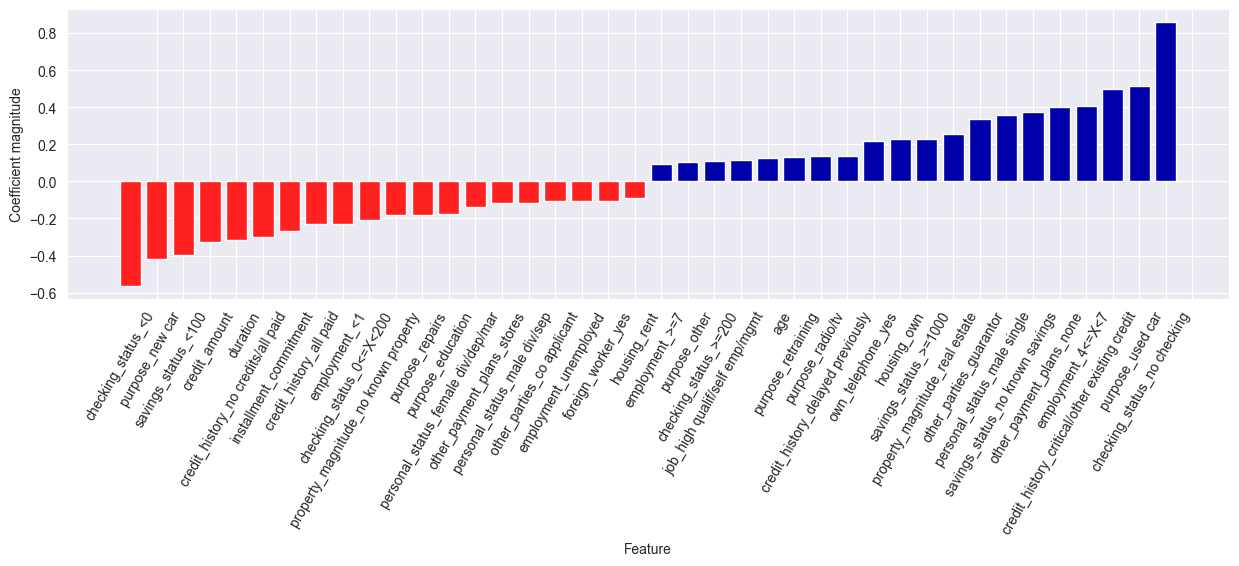

In [64]:
# Visualizing the Top 20 Features and Coeffs of Logistic Regression
mglearn.tools.visualize_coefficients(coeffs_lr, features, n_top_features=20)

<br>

#### Linear Support Vector Classifier:

In [65]:
# Best SVC Pipeline
best_svcpipe = gscv.best_estimator_
best_svcpipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['employment',
                                                   'checking_status',
                                                   'own_telephone',
                                                   'savings_status',
                                                   'property_magnitude', 'job',
                                                   'housing', 'foreign_worker',
                                                   'purpose', 'credit_history',
                                                   'personal_status',
                                                   'other_payment_plans',
                                                   'other_parties']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['duration', 'credit_amount',
                                                   'installment_commitment',
                                                   'residence_since', 'age',
                                                   'existing_credits',
                                                   'num_dependents'])])),
                ('svc', SVC(C=0.1, gamma=10, kernel='linear'))])

In [66]:
# Best SVC Model
best_svc = best_svcpipe.named_steps['svc']
best_svc

SVC(C=0.1, gamma=10, kernel='linear')

In [67]:
# Coefficients
coeffs_svc = best_svc.coef_.flatten()
coeffs_svc

array([ 0.01286026,  0.2851708 , -0.24364077,  0.09936074, -0.15375102,
       -0.17364426, -0.58212259,  0.22284449,  0.53292236,  0.07382178,
       -0.03596523, -0.13670585, -0.37987018,  0.2615881 ,  0.29095316,
        0.07784651,  0.07608224, -0.26706353,  0.11313479,  0.18776764,
       -0.02797193, -0.1       , -0.05979571,  0.0725846 ,  0.11758157,
       -0.19016617, -0.4       , -0.02971946, -0.1       , -0.3000148 ,
        0.16052578, -0.43428141,  0.22925033,  0.00829107, -0.17696728,
        0.22133594,  0.42157984, -0.41271205,  0.47923633,  0.32394115,
        0.11061873, -0.50108416, -0.14840944, -0.19305848,  0.13044351,
        0.21102442, -0.09568498,  0.25497251, -0.15928753, -0.1       ,
        0.28858095, -0.18858095, -0.26690499, -0.24853641, -0.24521106,
       -0.00834334,  0.104257  , -0.09586443, -0.00681331])

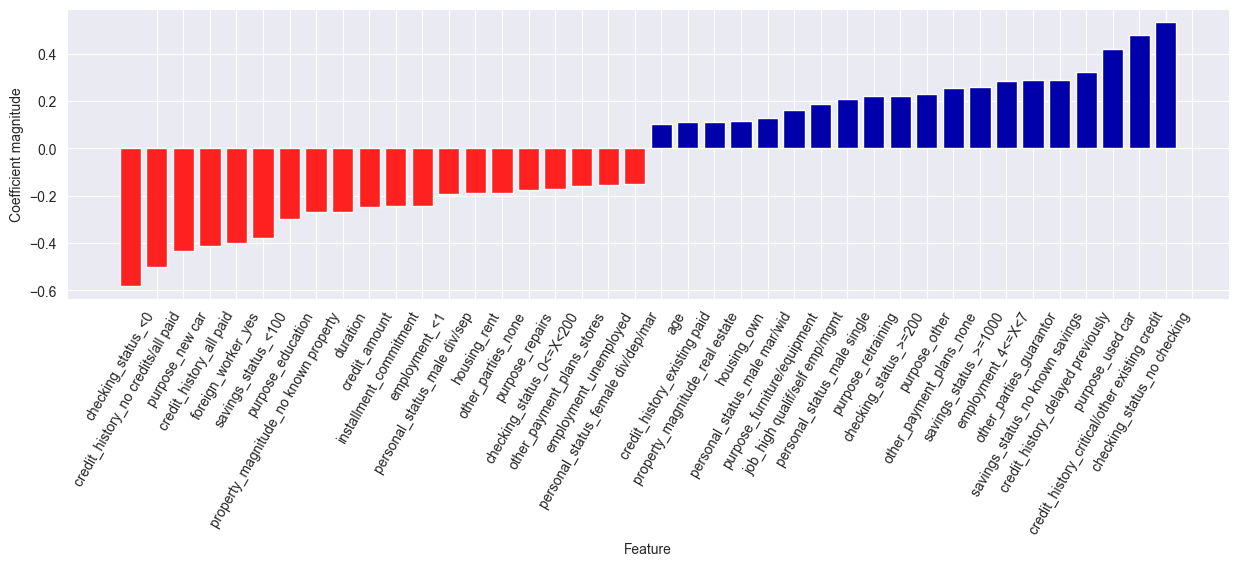

In [68]:
# Visualizing the Top 20 Features and Coeffs of Linear SVM
mglearn.tools.visualize_coefficients(coeffs_svc, features, n_top_features=20)

<br>

#### Here we can notice one thing about both the visualized graphs of Coefficients of both Models are very similar to each other by observing the Graphs Carefully.

<br> <br>